In [62]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as mt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [63]:
tf.__version__

'2.8.2'

In [64]:
ds = pd.read_csv('diabetes.csv')
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Exploring the dataset

In [65]:
ds.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

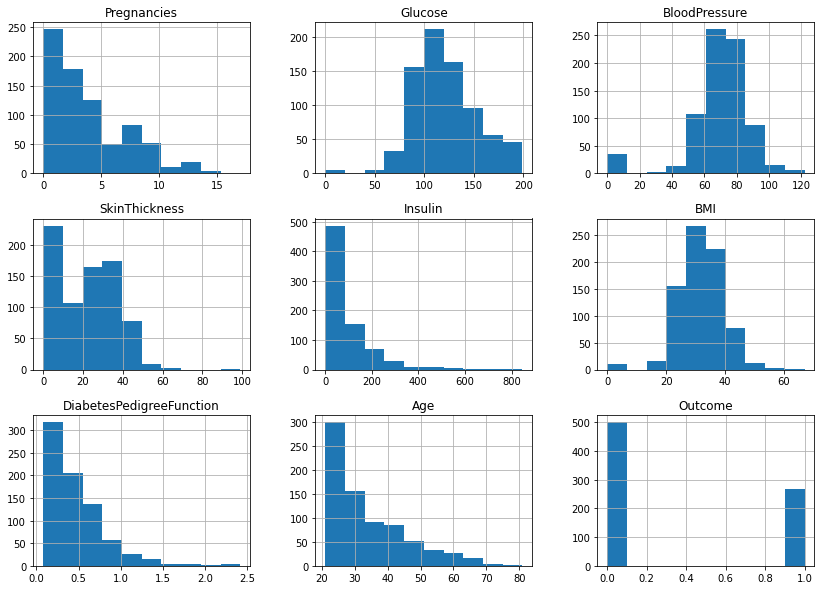

In [66]:
ds.hist(figsize=(14,10));

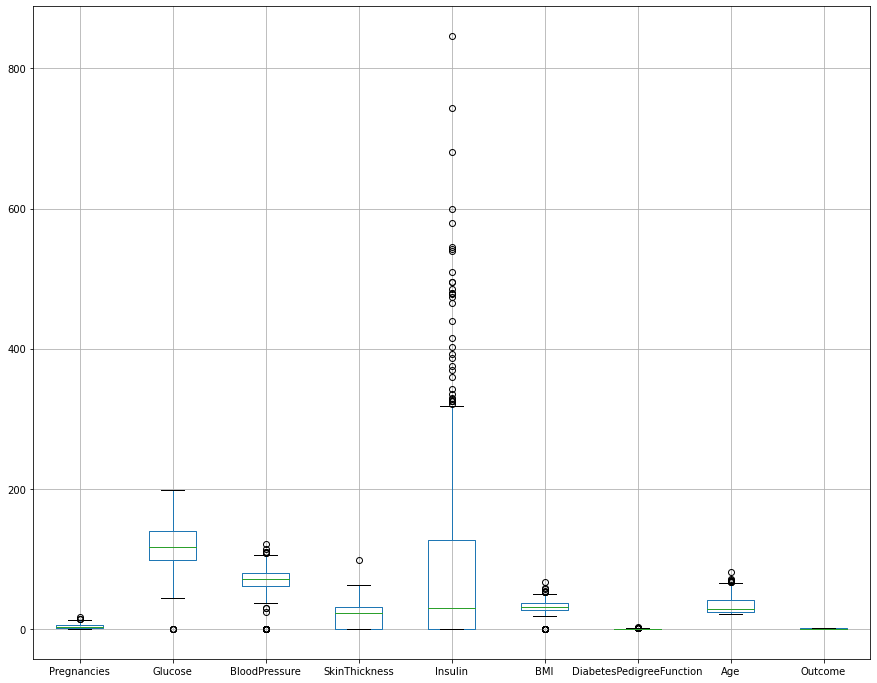

In [67]:
ds.boxplot(figsize=(15,12))

In [68]:
ds.query('BloodPressure == 0').count()

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

In [69]:
#Replace the zeros by the median

def zero_to_median(ds,feature):
  mdn = ds[feature].median()
  ds[feature] = ds[feature].apply(lambda x: mdn if x==0 else x )


In [70]:
features_to_median = ['BloodPressure', 'Glucose', 'BMI']

for feature in features_to_median:
  zero_to_median(ds,feature)


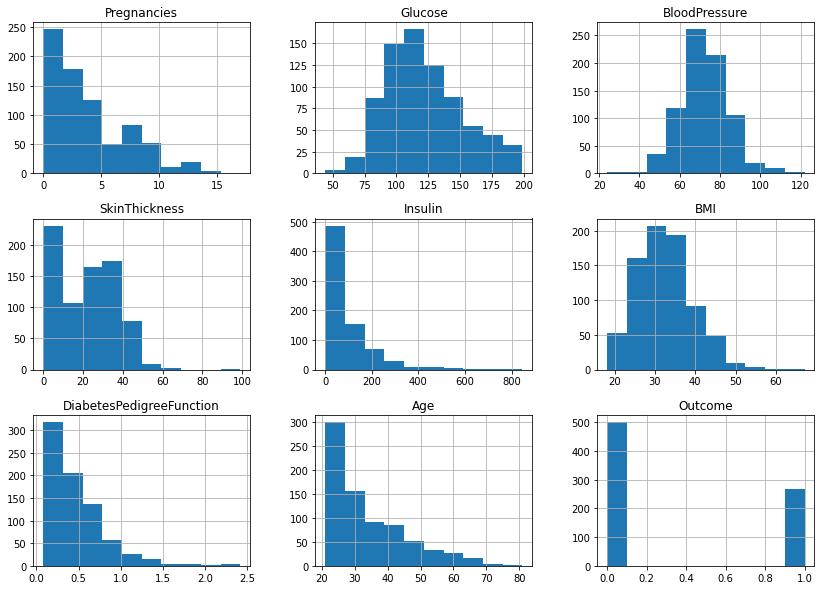

In [71]:
ds.hist(figsize=(14,10));

In [72]:
ds.query('SkinThickness>60').SkinThickness.count()

2

SkinThickness over 60 appears to be incorrect

In [73]:
ds.SkinThickness = ds.SkinThickness.apply(lambda x: ds.SkinThickness.median() if x>60 else x) 

In [74]:
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1


division between train and test 

In [75]:
x = ds.drop(['Outcome'], axis=1)
y = ds.Outcome

Rescaling data

In [76]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [77]:
x.shape

(768, 8)

In [78]:
y = y.values

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [80]:
x_train.shape, x_test.shape

((576, 8), (192, 8))

#Neural Network model

## First run

In [81]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_shape = (8,), units =50, activation= 'relu'))
model.add(tf.keras.layers.Dense(units =50, activation= 'relu'))
model.add(tf.keras.layers.Dense(units =1, activation= 'sigmoid'))

In [82]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [83]:
hist = model.fit(x_train, y_train, epochs=50, batch_size=30, validation_split=0.2)

Epoch 1/50
16/16 [==============================] - 1s 12ms/step - loss: 0.6412 - accuracy: 0.6457 - val_loss: 0.5844 - val_accuracy: 0.7414
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5654 - accuracy: 0.7065 - val_loss: 0.5359 - val_accuracy: 0.7586
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5191 - accuracy: 0.7435 - val_loss: 0.5040 - val_accuracy: 0.7672
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4903 - accuracy: 0.7543 - val_loss: 0.4839 - val_accuracy: 0.7931
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4681 - accuracy: 0.7630 - val_loss: 0.4796 - val_accuracy: 0.7845
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4560 - accuracy: 0.7717 - val_loss: 0.4775 - val_accuracy: 0.7845
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4451 - accuracy: 0.7804 - val_loss: 0.4727 - val_accuracy: 0.7672
Epoch 8/50
16/16 [=

In [84]:
epochs = hist.epoch
loss = hist.history['loss']
accuracy = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']


Looking for training information (like overfitting)

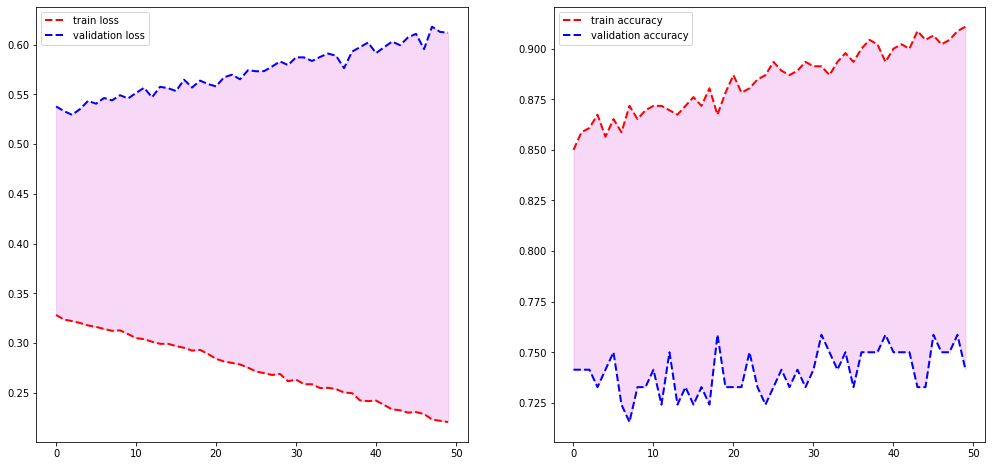

In [25]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.plot(epochs, loss,'r--', label='train loss', lw = 2)
plt.plot(epochs, val_loss, 'b--',label='validation loss',lw = 2)
plt.fill_between(epochs,loss,val_loss, color = '#CC00CC', alpha = 0.15)
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, accuracy,'r--', label='train accuracy',lw = 2)
plt.plot(epochs, val_accuracy, 'b--',label='validation accuracy',lw = 2)
plt.fill_between(epochs,accuracy,val_accuracy, color = '#CC00CC', alpha = 0.15)
plt.legend()

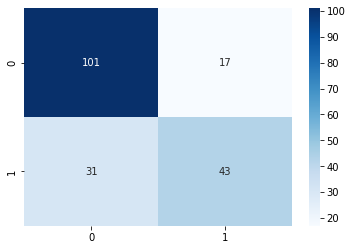

In [85]:
pred = model.predict(x_test)
pred = pred>0.5
cm = mt.confusion_matrix(y_test,pred)
sns.heatmap(cm, annot = True, fmt = '.0f', cmap = 'Blues')

In [86]:
print(mt.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       118
           1       0.72      0.58      0.64        74

    accuracy                           0.75       192
   macro avg       0.74      0.72      0.72       192
weighted avg       0.75      0.75      0.74       192



Overfitting about 8 epochs. Let's change some hyperparameters and fitting again

#Training again

<p><strong>Overfitting in about 8 epochs. Let's change some hyperparameters and fitting again</strong></p>

## Second run

In [26]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_shape = (8,), units =50, activation= 'relu'))
model.add(tf.keras.layers.Dense(units =50, activation= 'relu'))
model.add(tf.keras.layers.Dense(units =1, activation= 'sigmoid'))

In [27]:
optimizer =tf.keras.optimizers.Adamax(learning_rate=0.005, beta_1=0.6, beta_2=0.6)
loss = tf.keras.losses.BinaryFocalCrossentropy(gamma=2, from_logits=True)

model.compile(optimizer=optimizer, loss = loss, metrics=['accuracy'])

In [28]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=30, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


16/16 [==============================] - 1s 21ms/step - loss: 0.1354 - accuracy: 0.7022 - val_loss: 0.1216 - val_accuracy: 0.6897
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.1107 - accuracy: 0.7435 - val_loss: 0.1190 - val_accuracy: 0.7586
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1057 - accuracy: 0.7696 - val_loss: 0.1188 - val_accuracy: 0.7414
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1035 - accuracy: 0.7848 - val_loss: 0.1203 - val_accuracy: 0.6983
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1018 - accuracy: 0.7739 - val_loss: 0.1193 - val_accuracy: 0.7155
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0977 - accuracy: 0.7848 - val_loss: 0.1259 - val_accuracy: 0.7414
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0947 - accuracy: 0.7957 - val_loss: 0.1276 - val_accuracy: 0.7328
Epoch 8/100
16/16 [=====

In [29]:
epochs = np.array(hist.epoch)
loss = np.array(hist.history['loss'])
accuracy = np.array(hist.history['accuracy'])
val_loss = np.array(hist.history['val_loss'])
val_accuracy = np.array(hist.history['val_accuracy'])


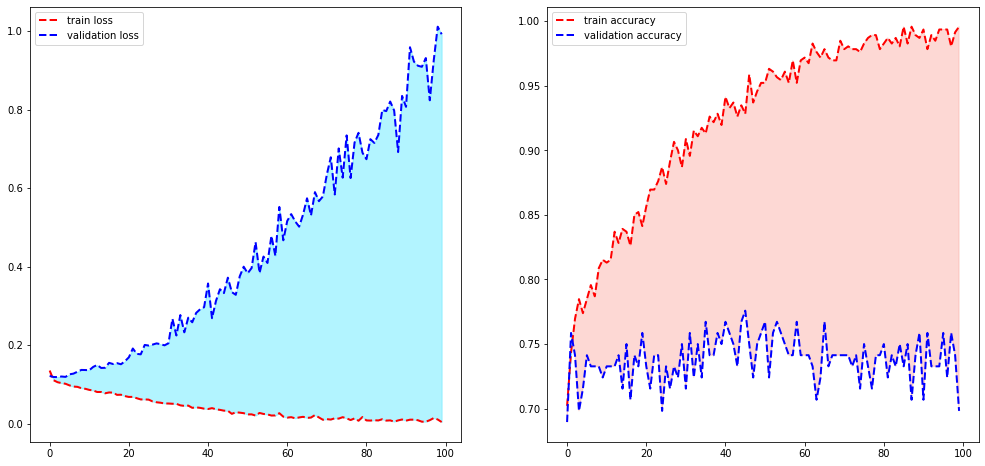

In [30]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.plot(epochs, loss,'r--', label='train loss', lw = 2)
plt.plot(epochs, val_loss, 'b--',label='validation loss',lw = 2)
#Fill between curves for better visualization
plt.fill_between(epochs,loss,val_loss,where=(val_loss > loss), color = '#00DCFF', alpha = 0.3,interpolate=True)
plt.fill_between(epochs,loss,val_loss,where=(val_loss<loss), color = '#FA8072', alpha = 0.3,interpolate=True)
#
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, accuracy,'r--', label='train accuracy',lw = 2)
plt.plot(epochs, val_accuracy, 'b--',label='validation accuracy',lw = 2)
#Fill between curves for better visualization
plt.fill_between(epochs,accuracy,val_accuracy,where=(val_accuracy > accuracy), color = '#00DCFF', alpha = 0.3,interpolate=True)
plt.fill_between(epochs,accuracy,val_accuracy,where=(val_accuracy<accuracy), color = '#FA8072', alpha = 0.3,interpolate=True)
#
plt.legend()

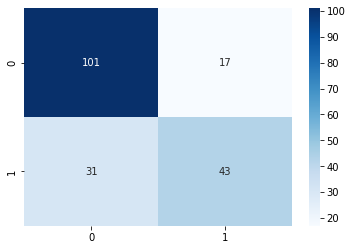

In [87]:
pred = model.predict(x_test)
pred = pred>0.5
cm = mt.confusion_matrix(y_test,pred)
sns.heatmap(cm, annot = True, fmt = '.0f', cmap = 'Blues')

In [88]:
print(mt.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       118
           1       0.72      0.58      0.64        74

    accuracy                           0.75       192
   macro avg       0.74      0.72      0.72       192
weighted avg       0.75      0.75      0.74       192



<p><font color='#00C0CC' size = 5><center> Above we can see an extreme example of overfitting</center></font></p>
Lets try one more time

## Third run

In [153]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_shape = (8,), units =50, activation= 'relu'))
model.add(tf.keras.layers.Dense(units =50, activation= 'relu'))
model.add(tf.keras.layers.Dense(units =1, activation= 'sigmoid'))

In [154]:
optimizer =tf.keras.optimizers.Adamax(learning_rate=0.0005, beta_1=0.6, beta_2=0.6)

model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['binary_accuracy'])

In [155]:
hist = model.fit(x_train, y_train, epochs=13, batch_size=20, validation_split=0.2)

Epoch 1/13
23/23 [==============================] - 1s 9ms/step - loss: 0.6383 - binary_accuracy: 0.6217 - val_loss: 0.5995 - val_binary_accuracy: 0.7155
Epoch 2/13
23/23 [==============================] - 0s 3ms/step - loss: 0.5733 - binary_accuracy: 0.6957 - val_loss: 0.5483 - val_binary_accuracy: 0.7155
Epoch 3/13
23/23 [==============================] - 0s 3ms/step - loss: 0.5258 - binary_accuracy: 0.7391 - val_loss: 0.5131 - val_binary_accuracy: 0.7155
Epoch 4/13
23/23 [==============================] - 0s 3ms/step - loss: 0.4960 - binary_accuracy: 0.7609 - val_loss: 0.4920 - val_binary_accuracy: 0.7328
Epoch 5/13
23/23 [==============================] - 0s 3ms/step - loss: 0.4748 - binary_accuracy: 0.7652 - val_loss: 0.4778 - val_binary_accuracy: 0.7672
Epoch 6/13
23/23 [==============================] - 0s 4ms/step - loss: 0.4621 - binary_accuracy: 0.7630 - val_loss: 0.4700 - val_binary_accuracy: 0.7672
Epoch 7/13
23/23 [==============================] - 0s 3ms/step - loss: 0.45

In [156]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [157]:
epochs = np.array(hist.epoch)
loss = np.array(hist.history['loss'])
bin_accuracy = np.array(hist.history['binary_accuracy'])
val_loss = np.array(hist.history['val_loss'])
val_accuracy = np.array(hist.history['val_binary_accuracy'])

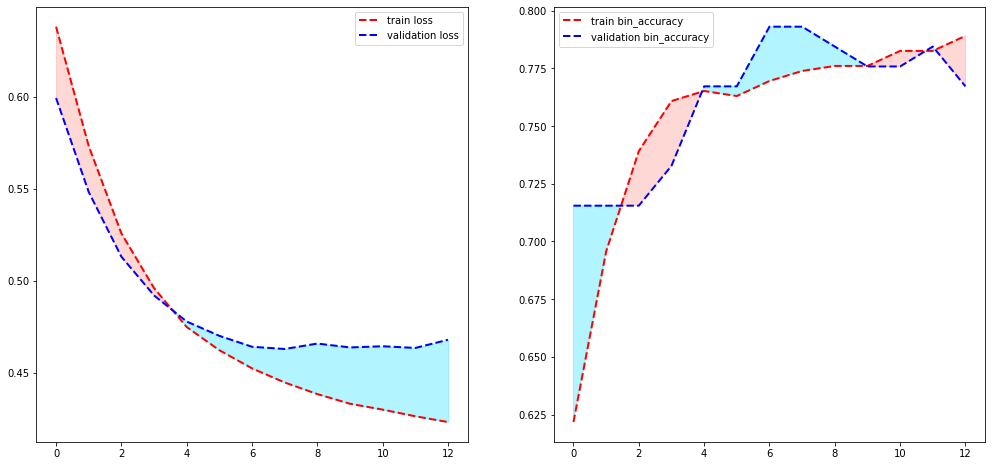

In [158]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.plot(epochs, loss,'r--', label='train loss', lw = 2)
plt.plot(epochs, val_loss, 'b--',label='validation loss',lw = 2)
#Fill between curves for better visualization
plt.fill_between(epochs,loss,val_loss,where=(val_loss > loss), color = '#00DCFF', alpha = 0.3,interpolate=True)
plt.fill_between(epochs,loss,val_loss,where=(val_loss<loss), color = '#FA8072', alpha = 0.3,interpolate=True)
#
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, bin_accuracy,'r--', label='train bin_accuracy',lw = 2)
plt.plot(epochs, val_accuracy, 'b--',label='validation bin_accuracy',lw = 2)
#Fill between curves for better visualization
plt.fill_between(epochs,bin_accuracy,val_accuracy,where=(val_accuracy > bin_accuracy), color = '#00DCFF', alpha = 0.3,interpolate=True)
plt.fill_between(epochs,bin_accuracy,val_accuracy,where=(val_accuracy<bin_accuracy), color = '#FA8072', alpha = 0.3,interpolate=True)
#
plt.legend()

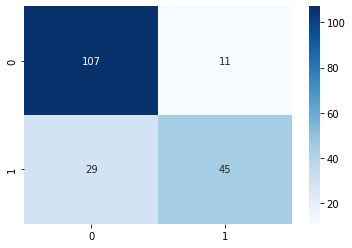

In [159]:
pred = model.predict(x_test)
pred = pred>0.5
cm = mt.confusion_matrix(y_test,pred)
sns.heatmap(cm, annot = True, fmt = '.0f', cmap = 'Blues')

In [160]:
print(mt.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       118
           1       0.80      0.61      0.69        74

    accuracy                           0.79       192
   macro avg       0.80      0.76      0.77       192
weighted avg       0.79      0.79      0.78       192



This result has better recall